### Training

## Training RandomForestClassifier

In [2]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Load dataset
df = pd.read_csv("thyroid_cancer_risk_data.csv")  # Replace with actual dataset path

# Drop Patient_ID
df.drop(columns=["Patient_ID"], inplace=True)

# Encode ordinal column
risk_mapping = {"Low": 0, "Medium": 1, "High": 2}
df["Thyroid_Cancer_Risk"] = df["Thyroid_Cancer_Risk"].map(risk_mapping)

# Encode categorical features and save encoders
categorical_cols = ["Gender", "Country", "Ethnicity", "Family_History", "Radiation_Exposure", 
                     "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes"]

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Encode target variable
df["Diagnosis"] = df["Diagnosis"].map({"Benign": 0, "Malignant": 1})

# Handle class imbalance using SMOTE
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the trained model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.44      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539

ROC-AUC Score: 0.6935718867964985
Confusion Matrix:
 [[30696  1919]
 [ 5561  4363]]


### Saving the model parameters

In [4]:
import os
from os.path import join as osp
import joblib

dir_name = "./saved_params"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

# Save model and scaler
joblib.dump(model, osp(f"{dir_name}", "model.pkl"))
joblib.dump(scaler, osp(f"{dir_name}", "scaler.pkl"))
joblib.dump(encoders, osp(f"{dir_name}", "encoders.pkl"))
joblib.dump(X.columns.tolist(), osp(f"{dir_name}", "feature_columns.pkl"))
joblib.dump(risk_mapping, osp(f"{dir_name}", "risk_mapping.pkl"))

['./saved_params\\risk_mapping.pkl']

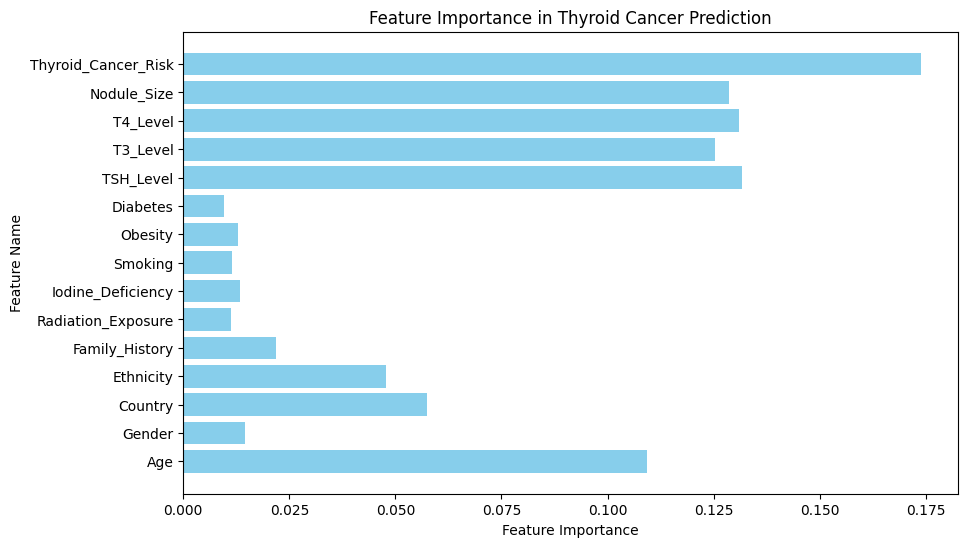

In [3]:
import matplotlib.pyplot as plt

feature_importances  = model.feature_importances_
feature_names = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Thyroid Cancer Prediction')
plt.show()

## Training Logistic Regression

In [4]:
import pandas as pd
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Load dataset
df = pd.read_csv("thyroid_cancer_risk_data.csv")  # Replace with actual dataset path

# Drop Patient_ID
df.drop(columns=["Patient_ID"], inplace=True)

# Encode ordinal column
risk_mapping = {"Low": 0, "Medium": 1, "High": 2}
df["Thyroid_Cancer_Risk"] = df["Thyroid_Cancer_Risk"].map(risk_mapping)

# Encode categorical features and save encoders
categorical_cols = ["Gender", "Country", "Ethnicity", "Family_History", "Radiation_Exposure", 
                     "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes"]

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Encode target variable
df["Diagnosis"] = df["Diagnosis"].map({"Benign": 0, "Malignant": 1})

# Handle class imbalance using SMOTE
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the trained model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.43      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539

ROC-AUC Score: 0.6943440050871369
Confusion Matrix:
 [[30720  1895]
 [ 5624  4300]]
